In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from json import load
from src.monopole import monopoleFlowSy, monopoleFlowSyE, PATH_DATA

PATH_ANALYTICAL = PATH_DATA.joinpath('monopoleFlow', 'analytical')

# Solution for M = 0.5

In [ ]:
monopoleFlowSy(
    t           = [3, 2],
    xlim        = (-260, 260),
    ylim        = (-260, 260),
    nxy         = (2*260+1, 2*260+1),
    savePath    = PATH_ANALYTICAL,
    outName     = 'monopole_2s_3s.json')


# Solution for M = 0.2

In [13]:
%%time
d = 3*42
monopoleFlowSy(
    t           = [2],
    M           = 0.2,  
    xlim        = (-d, d),
    ylim        = (-d, d),
    nxy         = (2*d+1, 2*d+1),
    savePath    = PATH_ANALYTICAL,
    outName     = 'monopole_10Hz_M0.2_comp.json'
)

----- t obs = 2 -----
 - X = -120.0 - Complete
 - X = -110.0 - Complete
 - X = -100.0 - Complete
 - X = -90.0 - Complete
 - X = -80.0 - Complete
 - X = -70.0 - Complete
 - X = -60.0 - Complete
 - X = -50.0 - Complete
 - X = -40.0 - Complete
 - X = -30.0 - Complete
 - X = -20.0 - Complete
 - X = -10.0 - Complete
 - X = 0.0 - Complete
 - X = 10.0 - Complete
 - X = 20.0 - Complete
 - X = 30.0 - Complete
 - X = 40.0 - Complete
 - X = 50.0 - Complete
 - X = 60.0 - Complete
 - X = 70.0 - Complete
 - X = 80.0 - Complete
 - X = 90.0 - Complete
 - X = 100.0 - Complete
 - X = 110.0 - Complete
 - X = 120.0 - Complete
CPU times: total: 1h 15min 5s
Wall time: 1h 18min 2s


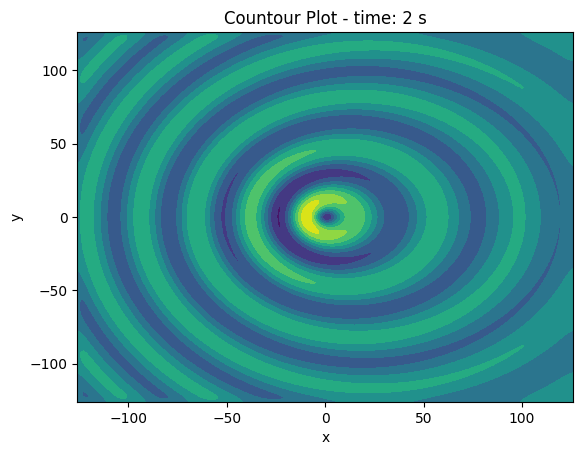

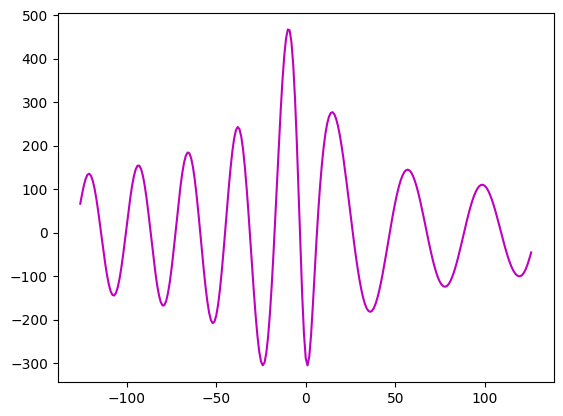

In [2]:
file_path  = PATH_ANALYTICAL.joinpath('monopole_10Hz_M0.2.json')
with open(file_path, 'r') as file:
    mono = load(file)
    nx = mono['nx']
    ny = mono['ny']
    ypos  = np.linspace(mono['ylim'][0], mono['ylim'][1], ny).searchsorted(0) 
    x  = np.linspace(mono['xlim'][0], mono['xlim'][1], nx)
    X = np.array(mono['X'])
    Y = np.array(mono['Y'])
    pressure = mono['time'] 

plt.contourf(X, Y, np.array(pressure['2']).T)
plt.xlabel('x')
plt.ylabel('y')

plt.title('Countour Plot - time: 2 s')
plt.show()

p = np.array(pressure['2']).T[ypos]
plt.plot(x, p, 'm')
plt.show()

##### Solução otimizada

In [3]:
%%time
#Teste symengine
d = 3*42
monopoleFlowSyE(
    t           = [2],
    M           = 0.2,  
    xlim        = (-d, d),
    ylim        = (-d, d),
    nxy         = (2*d+1, 2*d+1),
    savePath    = PATH_ANALYTICAL,
    outName     = 'monopole_10Hz_M0.2_comp_otm.json'
)

----- t obs = 2 -----
 - X = -120.0 - Complete
 - X = -110.0 - Complete
 - X = -100.0 - Complete
 - X = -90.0 - Complete
 - X = -80.0 - Complete
 - X = -70.0 - Complete
 - X = -60.0 - Complete
 - X = -50.0 - Complete
 - X = -40.0 - Complete
 - X = -30.0 - Complete
 - X = -20.0 - Complete
 - X = -10.0 - Complete
 - X = 0.0 - Complete
 - X = 10.0 - Complete
 - X = 20.0 - Complete
 - X = 30.0 - Complete
 - X = 40.0 - Complete
 - X = 50.0 - Complete
 - X = 60.0 - Complete
 - X = 70.0 - Complete
 - X = 80.0 - Complete
 - X = 90.0 - Complete
 - X = 100.0 - Complete
 - X = 110.0 - Complete
 - X = 120.0 - Complete
CPU times: total: 1.33 s
Wall time: 1.48 s


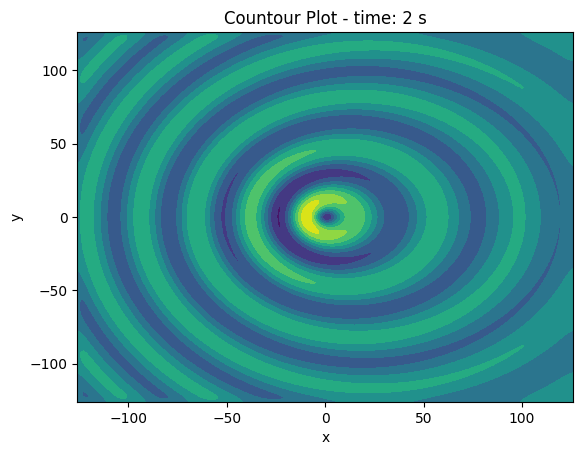

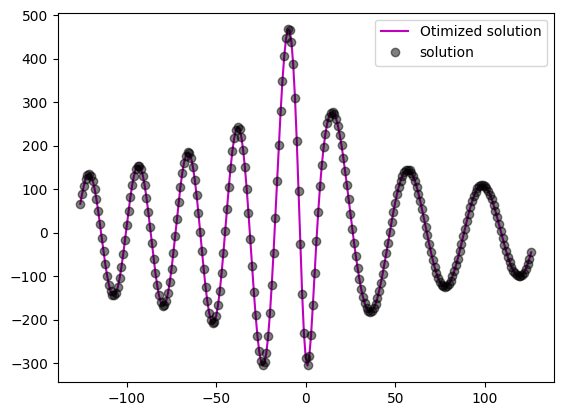

In [6]:
file_path  = PATH_ANALYTICAL.joinpath('monopole_10Hz_M0.2_comp_otm.json')
with open(file_path, 'r') as file:
    mono = load(file)
    nx = mono['nx']
    ny = mono['ny']
    ypos  = np.linspace(mono['ylim'][0], mono['ylim'][1], ny).searchsorted(0) 
    x2  = np.linspace(mono['xlim'][0], mono['xlim'][1], nx)
    X = np.array(mono['X'])
    Y = np.array(mono['Y'])
    pressure = mono['time'] 

plt.contourf(X, Y, np.array(pressure['2']).T)
plt.xlabel('x')
plt.ylabel('y')

plt.title('Countour Plot - time: 2 s')
plt.show()

p2 = np.array(pressure['2']).T[ypos]
plt.plot(x2, p2, 'm', label = 'Otimized solution')
plt.plot(x, p, 'ko', label = 'solution', alpha = 0.5)
plt.legend()
plt.show()

----- t obs = 3 -----
 - X = -120.0 - Complete
 - X = -110.0 - Complete
 - X = -100.0 - Complete
 - X = -90.0 - Complete
 - X = -80.0 - Complete
 - X = -70.0 - Complete
 - X = -60.0 - Complete
 - X = -50.0 - Complete
 - X = -40.0 - Complete
 - X = -30.0 - Complete
 - X = -20.0 - Complete
 - X = -10.0 - Complete
 - X = 0.0 - Complete
 - X = 10.0 - Complete
 - X = 20.0 - Complete
 - X = 30.0 - Complete
 - X = 40.0 - Complete
 - X = 50.0 - Complete
 - X = 60.0 - Complete
 - X = 70.0 - Complete
 - X = 80.0 - Complete
 - X = 90.0 - Complete
 - X = 100.0 - Complete
 - X = 110.0 - Complete
 - X = 120.0 - Complete


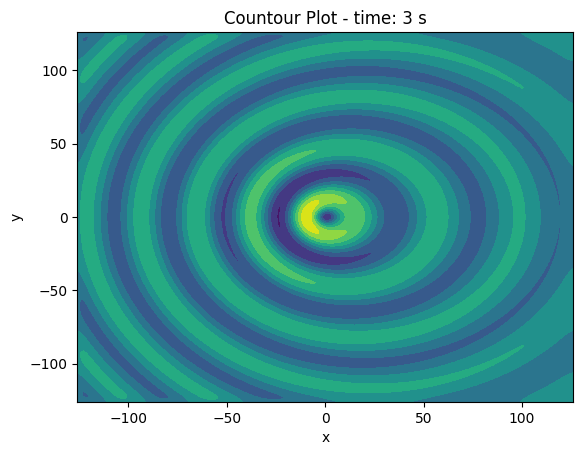

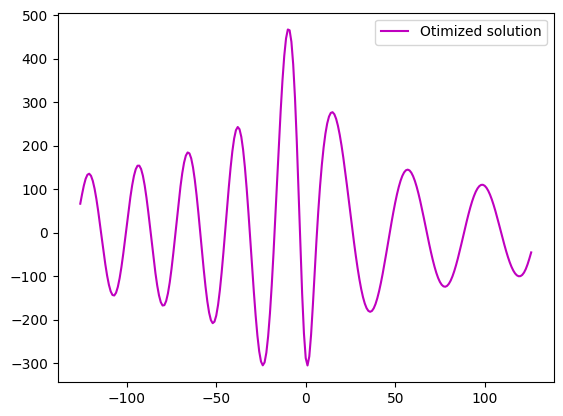

In [6]:
name = 'monopole_10Hz_M0.2_3s.json'
d = 3*42
monopoleFlowSyE(
    t           = [3],
    M           = 0.2,  
    xlim        = (-d, d),
    ylim        = (-d, d),
    nxy         = (2*d+1, 2*d+1),
    savePath    = PATH_ANALYTICAL,
    outName     = name
)

file_path  = PATH_ANALYTICAL.joinpath(name)
with open(file_path, 'r') as file:
    mono = load(file)
    nx = mono['nx']
    ny = mono['ny']
    ypos  = np.linspace(mono['ylim'][0], mono['ylim'][1], ny).searchsorted(0) 
    x2  = np.linspace(mono['xlim'][0], mono['xlim'][1], nx)
    X = np.array(mono['X'])
    Y = np.array(mono['Y'])
    pressure = mono['time'] 

plt.contourf(X, Y, np.array(pressure['3']).T)
plt.xlabel('x')
plt.ylabel('y')

plt.title('Countour Plot - time: 3 s')
plt.show()

p2 = np.array(pressure['3']).T[ypos]
plt.plot(x2, p2, 'm', label = 'Otimized solution')
plt.legend()
plt.show()

#### Solução para vários time steps

In [ ]:
%%time
timeSteps = np.round(np.arange(0.2, 4.001, 0.001), 3)
print(len(timeSteps))

# Solução otimizada
d = 3*42
monopoleFlowSyE(
    t               = list(timeSteps),
    M               = 0.2,  
    xlim            = (-d, d),
    ylim            = (-d, d),
    nxy             = (2*d+1, 2*d+1),
    savePath        = PATH_ANALYTICAL,
    printInterval   = 100,
    writeInterval   = 100,
    outName         = 'monopole_10Hz_M0.2_t0.2_4.0s.pickle'
)

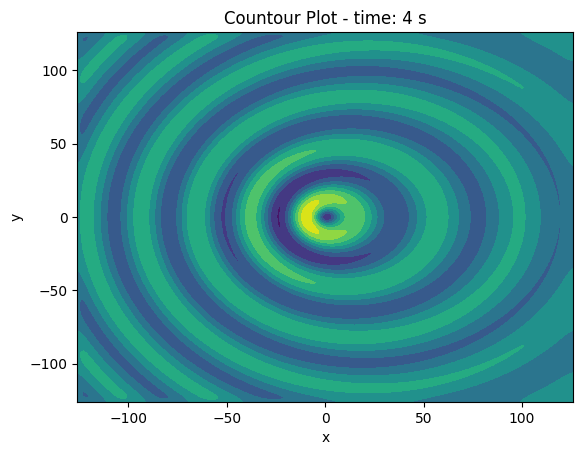

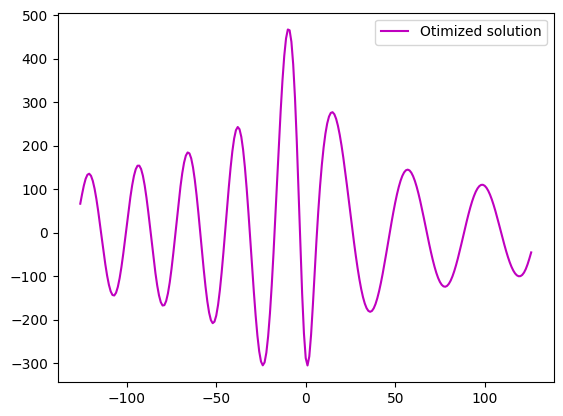

In [10]:
import plotly.graph_objects as go
file_path  = PATH_ANALYTICAL.joinpath('monopole_10Hz_M0.2_t0.2_4.0s.pickle.pkl')
mono = pd.read_pickle(file_path)


nx = mono['nx']
ny = mono['ny']
ypos  = np.linspace(mono['ylim'][0], mono['ylim'][1], ny).searchsorted(0) 
x2  = np.linspace(mono['xlim'][0], mono['xlim'][1], nx)
X = np.array(mono['X'])
Y = np.array(mono['Y'])
pressure  = mono['time']

plt.contourf(X, Y, pressure['4.0'].T)
plt.xlabel('x')
plt.ylabel('y')

plt.title('Countour Plot - time: 4 s')
plt.show()

p2 = np.array(pressure['4.0']).T[ypos]
plt.plot(x2, p2, 'm', label = 'Otimized solution')
plt.legend()
plt.show()